# (11주차) 5월18일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### Import

In [2]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
tnp.experimental_enable_numpy_behavior()

### CONV의 역할

`-` 데이터생성 (그냥 흑백대비 데이터)

In [7]:
_X1 = tnp.ones([50,25])*10 
_X1

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])>

In [8]:
_X2 = tnp.zeros([50,25])*10 
_X2

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [9]:
tf.concat([_X1,_X2],axis=1)

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.]])>

In [15]:
_noise = tnp.random.randn(50*50).reshape(50,50)
_noise

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[-0.30380244,  0.06484819,  0.60069937, ..., -0.49237769,
         1.72552047,  0.32319886],
       [-0.1442766 ,  0.32071132,  0.27135225, ...,  0.12584098,
         1.77500838,  0.30678486],
       [-0.98493241,  0.70428041, -0.10798709, ..., -0.07145503,
         0.11185082,  1.4473293 ],
       ...,
       [ 0.41430467, -0.67483518, -0.46844066, ...,  0.76154689,
        -1.60328529, -0.37098601],
       [-1.65297477, -1.45893833, -1.7887122 , ..., -0.81344932,
        -0.21032504, -0.53206832],
       [-0.2352507 , -0.77675024, -2.01329394, ..., -1.41071477,
        -1.20259288,  0.07060629]])>

In [16]:
XXX = tf.concat([_X1,_X2],axis=1) + _noise

In [24]:
XXX=XXX.reshape(1,50,50,1)

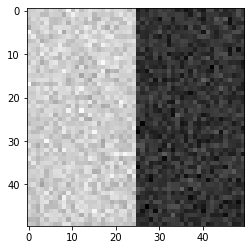

In [25]:
plt.imshow(XXX.reshape(50,50),cmap='gray')

`-` conv layer 생성 

In [26]:
conv = tf.keras.layers.Conv2D(2,(2,2)) 

In [27]:
conv.weights # 처음에는 가중치가 없음 

[]

In [31]:
conv(XXX) # 가중치를 만들기 위해서 XXX를 conv에 한번 통과시킴
conv.weights # 이제 가중치가 생김

[<tf.Variable 'conv2d_1/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
 array([[[[ 0.06554878,  0.39761645]],
 
         [[-0.4267348 , -0.376472  ]]],
 
 
        [[[ 0.2653011 ,  0.42274743]],
 
         [[ 0.4461723 , -0.6650867 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

`-` 가중치의 값을 확인해보자. 

In [34]:
conv.weights[0] # kernel에 해당하는것 

<tf.Variable 'conv2d_1/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
array([[[[ 0.06554878,  0.39761645]],

        [[-0.4267348 , -0.376472  ]]],


       [[[ 0.2653011 ,  0.42274743]],

        [[ 0.4461723 , -0.6650867 ]]]], dtype=float32)>

In [35]:
conv.weights[1] # bias에 해당하는것 

<tf.Variable 'conv2d_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

`-` 필터값을 원하는 것으로 변경해보자. 

In [40]:
w0 = [[0.25,0.25],[0.25,0.25]] # 잡티를 제거하는 효과를 준다. 
w1 = [[-1.0,1.0],[-1.0,1.0]] # 경계를 찾기 좋아보이는 필터이다. (엣지검출)

In [45]:
w=np.concatenate([np.array(w0).reshape(2,2,1,1),np.array(w1).reshape(2,2,1,1)],axis=-1)
w

array([[[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]],


       [[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]]])

In [47]:
b= np.array([0.0,0.0])
b

array([0., 0.])

In [50]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

- 첫번째는 평균을 구하는 필터, 
- 두번째는 엣지를 검출하는 필터 

`-` 필터를 넣은 결과를 확인 

In [61]:
XXX0=conv(XXX)[...,0] # 채널0
XXX0

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 9.984369  , 10.314403  , 10.114662  , ..., -0.2716803 ,
          0.78349805,  1.032628  ],
        [ 9.973946  , 10.29709   , 10.011451  , ..., -0.78137755,
          0.4853113 ,  0.91024333],
        [ 9.694317  , 10.180944  , 10.165418  , ..., -1.1441237 ,
         -0.10771888,  0.0131253 ],
        ...,
        [ 9.950029  ,  9.197831  ,  9.421099  , ...,  0.2848997 ,
         -0.24674678, -0.35682005],
        [ 9.156889  ,  8.902268  ,  9.352164  , ...,  0.01892059,
         -0.46637818, -0.67916614],
        [ 8.969021  ,  8.490577  ,  9.140195  , ..., -0.2541374 ,
         -0.9092705 , -0.46859497]]], dtype=float32)>

In [62]:
XXX1=conv(XXX)[...,1] # 채널1
XXX1

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 0.8336382 ,  0.48649216, -1.2854509 , ...,  0.35364777,
          3.8670654 , -2.8705451 ],
        [ 2.1542006 , -0.8616276 , -0.28092575, ...,  3.2342823 ,
          1.8324732 , -0.13274503],
        [ 2.0953035 , -0.14879417,  0.08668804, ...,  5.0843253 ,
         -0.93870586,  1.4220824 ],
        ...,
        [-1.498992  , -1.5097971 ,  2.4028683 , ...,  1.3495452 ,
         -3.4761312 ,  3.0358381 ],
        [-0.89510345, -0.12337971,  1.9229631 , ..., -0.17948717,
         -1.7617078 ,  0.910556  ],
        [-0.3474636 , -1.5663171 ,  4.1647916 , ..., -3.4317784 ,
          0.81124616,  0.9514559 ]]], dtype=float32)>

`-` 각 채널을 시각화 

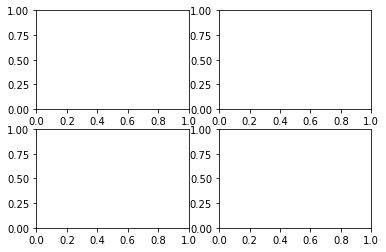

In [55]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

In [58]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')

In [63]:
ax3.imshow(XXX0.reshape(49,49),cmap='gray')

In [64]:
ax4.imshow(XXX1.reshape(49,49),cmap='gray')

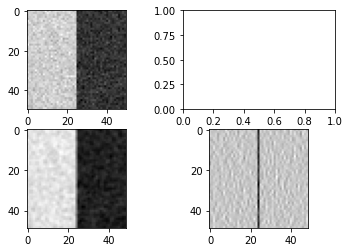

In [65]:
fig

- 2사분면: 원래이미지 
- 3사분면: 원래이미지 -> 평균을 의미하는 conv적용 
- 4사분면: 원래이미지 -> 엣지를 검출하는 conv적용

`-` conv(XXX)의 각 채널에 한번더 conv를 통과시켜보자

In [74]:
conv(XXX0.reshape(1,49,49,1))[...,0] ### XXX0 -> 평균필터 <=> XXX -> 평균필터 -> 평균필터 
conv(XXX0.reshape(1,49,49,1))[...,1] ### XXX0 -> 엣지필터 <=> XXX -> 평균필터 -> 엣지필터 
conv(XXX1.reshape(1,49,49,1))[...,0] ### XXX1 -> 평균필터 <=> XXX -> 엣지필터 -> 평균필터 
conv(XXX1.reshape(1,49,49,1))[...,1] ### XXX1 -> 엣지필터 <=> XXX -> 엣지필터 -> 엣지필터 

<tf.Tensor: shape=(1, 48, 48), dtype=float32, numpy=
array([[[ 1.01424513e+01,  1.01844015e+01,  9.86733055e+00, ...,
         -4.99692082e-01,  5.39378747e-02,  8.02920163e-01],
        [ 1.00365734e+01,  1.01637259e+01,  1.02149420e+01, ...,
         -7.43912578e-01, -3.86977196e-01,  3.25240284e-01],
        [ 9.74410343e+00,  1.01362820e+01,  1.04401426e+01, ...,
         -8.01947534e-01, -6.61381423e-01, -1.04143508e-01],
        ...,
        [ 9.49301243e+00,  9.22852516e+00,  9.76124573e+00, ...,
         -3.70009184e-01, -2.82902658e-01, -3.20988595e-01],
        [ 9.30175495e+00,  9.21834087e+00,  9.71927547e+00, ...,
         -1.98229820e-01, -1.02326170e-01, -4.37277794e-01],
        [ 8.87968922e+00,  8.97130108e+00,  9.59087849e+00, ...,
         -5.38469851e-03, -4.02716398e-01, -6.30852461e-01]]],
      dtype=float32)>

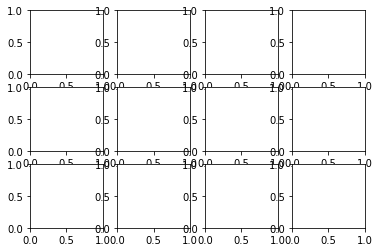

In [75]:
fig,ax =plt.subplots(3,4)

In [82]:
ax[0][0].imshow(XXX.reshape(50,50),cmap='gray') # 원래이미지

In [89]:
ax[1][0].imshow(XXX0.reshape(49,49),cmap='gray') # 원래이미지 -> 평균필터 
ax[1][2].imshow(XXX1.reshape(49,49),cmap='gray') # 원래이미지 -> 엣지필터

In [92]:
ax[2][0].imshow(conv(XXX0.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][1].imshow(conv(XXX0.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터
ax[2][2].imshow(conv(XXX1.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][3].imshow(conv(XXX1.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터

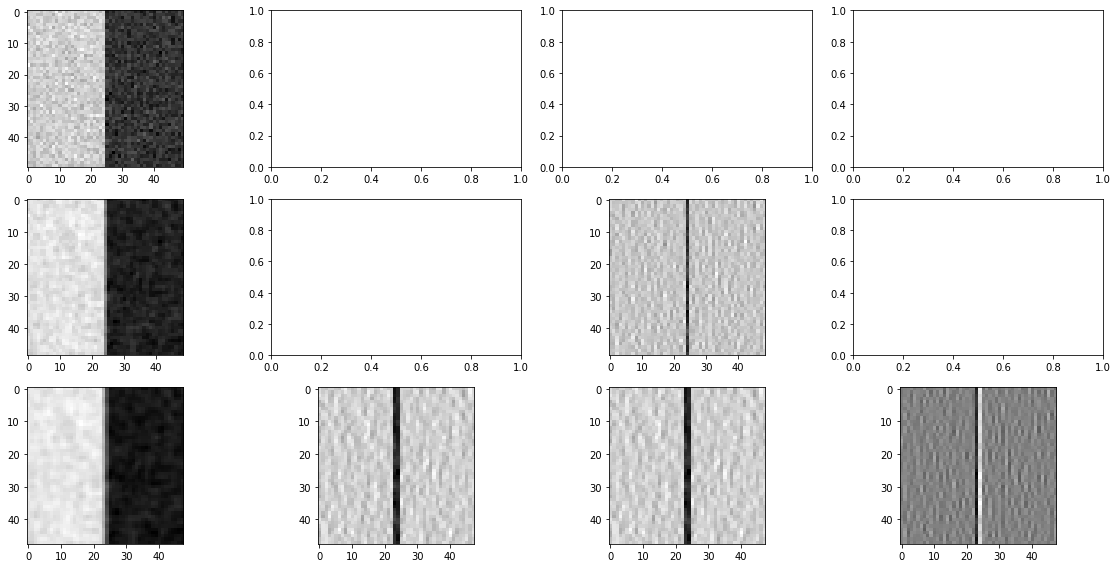

In [96]:
fig.set_figheight(8)
fig.set_figwidth(16)
fig.tight_layout()
fig

`-` 요약 
- conv의 weight에 따라서 엣지를 검출하는 필터가 만들어지기도 하고 스무딩의 역할을 하는 필터가 만들어지기도 한다. 그리고 우리는 의미를 알 수 없지만 어떠한 역할을 하는 필터가 만들어질 것이다. 
- 이것들을 조합하다보면 우연히 이미지를 분류하기에 유리한 특징을 뽑아내는 weight가 맞춰질 수도 있겠다. 
- 채널수를 많이 만들고 다양한 웨이트조합을 실험하다보면 보다 복잡한 이미지의 특징을 추출할 수도 있을 것이다? 
- 컨볼루션 레이어의 역할 = 이미지의 특징을 추출하는 역할 

`-` 참고: 스트라이드, 패딩
- 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동함 
- 패딩: 이미지의 가장자리에 정당한 값을 넣어서 (예를들어 0) 컨볼루션을 수행. 따라서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지한다. 

### MAXPOOL

`-` 기본적역할: 이미지의 크기를 줄이는 것 
- 이미지의의 크기를 줄여야하는 이유? 어차피 최종적으로 10차원으로 줄어야하므로 
- 이미지의 크기를 줄이면서도 동시에 아주 크리티컬한 특징은 손실없이 유지하고 싶다~

`-` 점점 작은 이미지가 되면서 중요한 특징들은 살아남지만 그렇지 않으면 죽는다. (캐리커쳐 느낌)

`-` 평균이 아니라 max를 쓴 이유는? 그냥 평균보다 나을것이라고 생각했음.. 
- 그런데 사실은 꼭 그렇지만은 않아서 최근에는 꼭 맥스풀링을 고집하진 않는 추세 (평균풀링도 많이씀) 

### CNN 아키텍처의 표현방법

`-` 아래와 같이 아키텍처의 다이어그램형태로 표현하고 굳이 노드별로 이미지를 그리진 않음

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/2560px-Comparison_image_neural_networks.svg.png)

`-` 물론 아래와 같이 그리는 경우도 있음

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

### Discusstion about CNN 

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다. 
- 시계열 (1차원격자), 이미지 (2차원격자)

`-` 실제응용에서 엄청난 성공을 거두었다. 

`-` 이름의 유래는 컨볼루션이라는 수학적 연산을 사용했기 때문 
- 컨볼루션은 조금 특별한 선형변환이다. 

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례이다. 

### CNN의 모티브

`-` 희소성 + 매개변수의 공유
- 다소 철학적인 모티브임 
- 희소성: 이미지를 분석하여 특징을 뽑아낼때 부분부분의 특징만 뽑으면 된다는 의미 
- 매개변수의 공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 의미 (스무딩이든 엣징이든). 즉 어떤지역은 스무딩, 어떤지역은 엣징을 할 필요가 없이 한채널에서는 엣징만, 다른채널에서는 스무딩만 수행한뒤 여러채널을 조합해서 이해하면 된다. 

`-` 매개변수 공유효과로 인해서 파라메터가 확 줄어든다. 

(예시) (1,6,6,1) -> (1,5,5,2) 
- MLP방식이면 (36,50) 의 차원을 가진 매트릭스가 필요함 => 1800개의 매개변수 필요
- CNN은 8개의 매개변수 필요

### CNN 신경망의 기본구조 

`-` 기본유닛 
- conv - activation - pooling
- conv - conv - activation - pooling

### 숙제 

`-` 아래와 같은 이미지의 edge를 찾아내는 (2,2) conv 필터를 설계하라. (코드구현없이 답만써도 무방) 

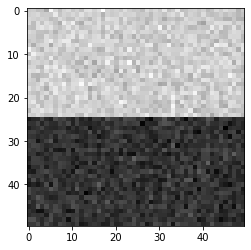

In [121]:
plt.imshow(XXX.reshape(50,50).T,cmap='gray')